In [4]:
#Import neccesary packages
import torch
import numpy as np
import pandas as pd
import model
import data
import sklearn

# Pretrained Word Embeddings

In [2]:
# Using pretrained GloVe 6 Billion Tokens embeddings
# To download, please go to: http://nlp.stanford.edu/data/glove.6B.zip
# To download more complex version: https://nlp.stanford.edu/projects/glove/

#Specify GloVe embeddings files directory
glove_home = '/Users/zhuorulin/Documents/DataScience/datasets/glove.6B/'

#Import only a portion of words for testing
words_to_load = 50000

import numpy as np

#Using 50 dimension embeddding for testing
with open(glove_home + 'glove.6B.50d.txt') as f:
    loaded_embeddings = np.zeros((words_to_load, 50))
    words = {}
    ordered_words = []
    for i, line in enumerate(f):
        if i >= words_to_load: 
            break
        
        s = line.split()
        loaded_embeddings[i, :] = np.asarray(s[1:])
        words[s[0]] = i
        ordered_words.append(s[0])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zhuorulin/Documents/DataScience/datasets/glove.6B/glove.6B.50d.txt'

In [5]:
#To access the word embedding of certain word use the format loaded_embedings[words['someword']]
#Example:
loaded_embeddings[words['something']]

array([ 0.39533  , -0.0064782, -0.26112  , -0.32292  ,  0.96181  ,
        0.11242  , -0.30927  ,  0.17085  , -0.38948  ,  0.77584  ,
       -0.31334  ,  0.54971  , -0.4579   ,  0.05835  ,  1.0643   ,
        0.57949  ,  0.74198  ,  0.22064  ,  0.11507  , -0.84422  ,
       -0.43365  ,  0.52626  ,  0.067037 ,  0.16294  ,  1.1345   ,
       -2.0336   , -1.211    ,  0.69115  ,  1.418    , -0.80188  ,
        3.0172   ,  0.36111  , -0.38275  , -0.51099  , -0.19531  ,
       -0.16375  , -0.024037 ,  0.32332  , -0.0070115, -0.49139  ,
       -0.28394  ,  0.06881  , -0.11819  ,  0.47825  ,  0.16551  ,
        0.29805  ,  0.010174 ,  0.20346  , -0.13682  ,  0.79782  ])

# How to access saved model and its embedding
(For t-SNE plotting)
An example of trained model file outputed by main.py can be obtained by simply running 
python main.py

In [3]:
test_model = torch.load('./saved_models/baseline_20epcs.pt')

/home/simonlzr/anaconda3/lib/python3.5/site-packages/torch/serialization.py:284: SourceChangeWarning: source code of class 'model.RNNModel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/simonlzr/anaconda3/lib/python3.5/site-packages/torch/serialization.py:284: SourceChangeWarning: source code of class 'torch.nn.modules.sparse.Embedding' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/simonlzr/anaconda3/lib/python3.5/site-packages/torch/serialization.py:284: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source 

In [6]:
#Access embedding encoder
embeddings = test_model.encoder

In [10]:
#Access the embedding of certain index
index = torch.autograd.Variable(torch.cuda.LongTensor([1]))
print(embeddings(index).data.cpu().numpy())

[[ 0.05410157  0.00914382 -0.02619506 -0.03508313 -0.10940051  0.11662303
  -0.0391235   0.14047623 -0.01419645 -0.0583433   0.15861873  0.08402319
  -0.02805875  0.08336291  0.3064045   0.14163132 -0.05227244 -0.01660749
  -0.00345682 -0.06356572  0.02832948  0.14776705  0.14149755  0.08763231
  -0.01289891  0.07681017 -0.08612793 -0.021301   -0.09356862 -0.16724671
   0.11338127  0.19931795  0.01676324  0.13795891 -0.15934202 -0.09487032
  -0.02861047  0.05946425  0.10910583 -0.0162857  -0.15224901  0.05008053
  -0.09350243 -0.07216047 -0.05812501  0.05326393  0.16828595  0.0536381
   0.09615086 -0.04556962]]


In [11]:
embeddings.weight.data


-5.2947e-02 -6.0556e-02  3.0369e-01  ...   7.4769e-02 -2.2228e-01 -3.3333e-02
 5.4102e-02  9.1438e-03 -2.6195e-02  ...   5.3638e-02  9.6151e-02 -4.5570e-02
 7.1613e-02 -1.1282e-01  3.3638e-02  ...   2.3517e-02  5.2494e-02  3.9618e-02
                ...                   ⋱                   ...                
-4.1156e-01  2.7232e-01 -3.3668e-01  ...  -2.8468e-01  7.3748e-02  1.9785e-01
-9.2592e-02 -1.9704e-01  1.6453e-01  ...   1.8624e-01 -1.4785e-01 -3.7434e-02
 2.3761e-02  2.9175e-01 -4.9306e-01  ...   3.1733e-01 -3.8825e-01 -4.7934e-02
[torch.cuda.FloatTensor of size 10000x50 (GPU 0)]

In [3]:
# Or load saved infosheets
import pickle
with open('info.pk','rb') as f:
    info = pickle.load(f)

In [4]:
embeddings = info['embeddings']

# Investigate Corpus

In [5]:
corpus = data.Corpus('../Starter_Codes/data/penn')
def batchify(data, bsz):
    nbatch = data.size(0) // bsz
    data = data.narrow(0, 0, nbatch * bsz)
    data = data.view(bsz, -1).t().contiguous()
    #if args.cuda:
        #data = data.cuda()
    return data

In [6]:
eval_batch_size = 10
train_data = batchify(corpus.train, 64)
val_data = batchify(corpus.valid, 64)
test_data = batchify(corpus.test, 64)

In [7]:
# Access word using index
print(corpus.dictionary.idx2word[1070])
# Access index using word
print(corpus.dictionary.word2idx['apple'])
print(corpus.dictionary.word2idx['orange'])
print(corpus.dictionary.word2idx['paris'])

opened
1410
5401
5992


In [21]:
#Test Data loader utilitie
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data,batch_size=len(train_data),shuffle=True)

In [22]:
iter(train_loader).next()


   24    24  1082  ...    108   794   189
 2324    48    32  ...     24   804  1800
  938  1195    56  ...     75  1282  1661
       ...          ⋱          ...       
 2378    35    95  ...    734   159   108
   26  1028  4386  ...     58  5831   597
   24   525    24  ...    706  9678   490
[torch.LongTensor of size 14524x64]

# t-sne ploting

In [18]:
# Using sklearn.manifold.TSNE package
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
index_to_plot = torch.autograd.Variable(torch.LongTensor(np.arange(0,50,1)))
Embeddings_to_plot = embeddings(index_to_plot).data

TypeError: 'numpy.ndarray' object is not callable

In [8]:
####Using preloaded embeddings
index = np.arange(0,50,1)
Embeddings_to_plot = embeddings[index,:]

In [9]:
from sklearn.manifold import TSNE
TSNE_model = TSNE(n_components=2,random_state=0)
#Transfer to 2 dimensions
representations2D = TSNE_model.fit_transform(Embeddings_to_plot)

In [10]:
words_to_plot = corpus.dictionary.idx2word[:50]

In [11]:
import matplotlib.pyplot as plt

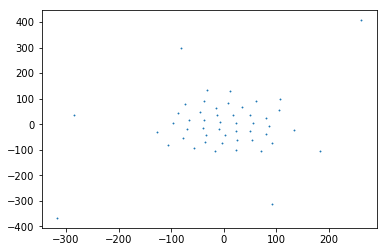

In [22]:
plt.scatter(representations2D[:,0],representations2D[:,1],marker='X',s=0.5)
plt.
#for word_idx,word in enumerate(words_to_plot):
#    plt.annotate(word,representations2D[word_idx])
#plt.xlim([-100,100])
#plt.ylim([-100,100])
plt.show()

# Automatic parameter grid search

In [12]:
import os

In [ ]:
os.system('python main.py --cuda')

In [28]:
%%writefile grid.py
import os
emsizes = [100,500,1000]
nhids = [100,500,1000]
nlayers = [2,3]
models = ['LSTM','GRU']
for model in models:
    for emsize in emsizes:
        for nhid in nhids:
            for nlayer in nlayers:
                save_path = 'saved_models/%s_%s_%s_%s.pt' %(model,nlayer,emsize,nhid)
                info_path = 'info_dict/%s_%s_%s_%s.pk' %(model,nlayer,emsize,nhid)
                cmdLine = 'python main.py --cuda --epochs 20 --batch-size 200 --model %s --nlayers %s --emsize %s --nhid %s\
                --save %s --infopath %s'%(model,nlayer,emsize,nhid,save_path,info_path)
                print(cmdLine)
                os.system(cmdLine)

Overwriting grid.py
